## Observations and Insights 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# Join the tables using inner join for Mouse ID

mouse_study_inner_join_df = pd.merge(study_results, mouse_metadata, how="inner", on=["Mouse ID", "Mouse ID"])
mouse_study_inner_join_df.head()

# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [5]:
mouse_study_inner_join_df.shape

(1893, 8)

In [6]:
mouse_metadata_df = pd.DataFrame(mouse_metadata)
mouse_metadata_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [7]:
mouse_metadata_df.shape

(249, 5)

In [8]:
study_results_df = pd.DataFrame(study_results)
study_results_df.head()




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [9]:
study_results_df.shape

(1893, 4)

In [10]:
# Checking the number of mice.
# Remove duplicates in the Mouse ID
mouse_duplicates = mouse_study_inner_join_df.drop_duplicates(subset ="Mouse ID")
mouse_duplicates

mouse_duplicates.count()["Mouse ID"]


249

In [11]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_id_duplicate = mouse_duplicates.loc[mouse_duplicates.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mouse_id_duplicate

mouse_data_duplicate =mouse_duplicates.loc[mouse_duplicates["Mouse ID"] == "g989"]
mouse_data_duplicate


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.0,0,Propriva,Female,21,26


In [12]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_inner_join_df.loc[mouse_study_inner_join_df["Mouse ID"] == "g989"]




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_mouse_study_df = mouse_study_inner_join_df.loc[mouse_study_inner_join_df["Mouse ID"] != "g989"]
new_mouse_study_df 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [14]:
# Checking the number of mice in the clean DataFrame.
new_mouse_study_df.drop_duplicates(subset ="Mouse ID").count()["Mouse ID"]


248

## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

Drug_Regimen_groupby = new_mouse_study_df.groupby(["Drug Regimen"])

Tumor_Vol_Mean = Drug_Regimen_groupby.mean()['Tumor Volume (mm3)']
Tumor_Vol_Median = Drug_Regimen_groupby.median()['Tumor Volume (mm3)']
Tumor_Vol_Var = Drug_Regimen_groupby.var()['Tumor Volume (mm3)']
Tumor_Vol_Std = Drug_Regimen_groupby.std()['Tumor Volume (mm3)']
Tumor_Vol_Sem = Drug_Regimen_groupby.sem()['Tumor Volume (mm3)']

#Create the columns
Tumor_Vol_Col = {"Mean Tumor": Tumor_Vol_Mean, "Volume Median Tumor": Tumor_Vol_Median, "Volume Tumor Volume Variance": Tumor_Vol_Var, 
                 "Tumor Volume Std. Dev.": Tumor_Vol_Std, "Tumor Volume Std. Err." : Tumor_Vol_Sem}
Tumor_Vol_Df = pd.DataFrame(Tumor_Vol_Col)
Tumor_Vol_Df













,Mean Tumor,Volume Median Tumor,Volume Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

tumor_vol_agg_df = new_mouse_study_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ['mean','median','var','std','sem']})
tumor_vol_agg_df



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

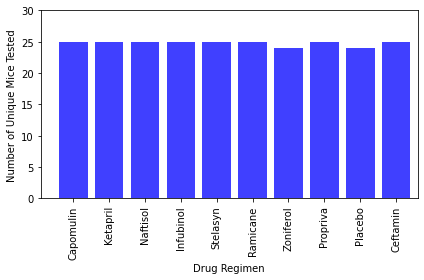

In [17]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# Create a DataFrame of unique mouse IDs and drug regimen.
# Group DataFrame by drug regimen and get a count of unique mice for each drug.

#Create values for x axis and y axis
Drug_Regimen_Df = new_mouse_study_df['Drug Regimen'].unique()
x_axis = np.arange(0, len(Drug_Regimen_Df))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

drug_regimen_count = new_mouse_study_df.groupby(['Drug Regimen']).nunique()
y_axis = drug_regimen_count['Mouse ID']

#Graph details
#plt.title("Total Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")

plt.xlim(-0.90, len(Drug_Regimen_Df)-.40)
plt.ylim(0, max(y_axis) + 5)

#Graph it
plt.bar(x_axis, y_axis, facecolor='blue', alpha=0.75, align='center')
plt.xticks(tick_locations, Drug_Regimen_Df, rotation='vertical')
plt.tight_layout()
plt.show()






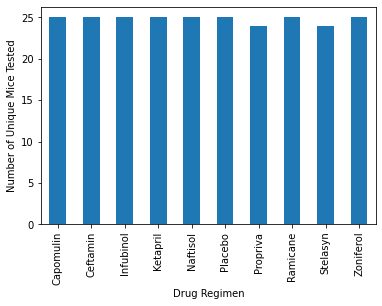

In [23]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
# Create a DataFrame of unique mouse IDs and drug regimen.
# Group DataFrame by drug regimen and get a count of unique mice for each drug.
new_bar_graph = drug_regimen_count['Mouse ID']
pyplot_graph = new_bar_graph.plot(kind='bar')
pyplot_graph.set_xlabel("Drug Regimen")
pyplot_graph.set_ylabel("Number of Unique Mice Tested")
plt.show()




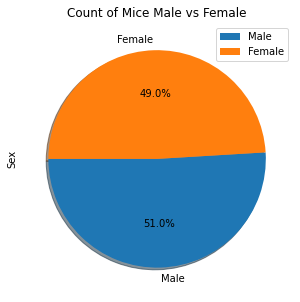

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender_counts = new_mouse_study_df['Sex'].value_counts()
mice_gender_df = pd.DataFrame(mice_gender_counts)
pandas_pie_chart = mice_gender_df.plot.pie(y='Sex',title='Count of Mice Male vs Female',shadow=True, startangle=180, figsize=(5,5),autopct="%1.1f%%")


Text(0.5, 1.0, 'Count of Mice Male vs Female')

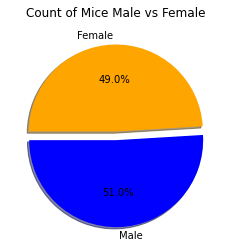

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender_df
labels = ['Male', 'Female']
sizes = [958, 922]
colors = ['blue', 'orange']
explode=[0.1,0]
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180,)
plt.title('Count of Mice Male vs Female')


## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drug_regiment_list = new_mouse_study_df.loc[(new_mouse_study_df["Drug Regimen"] == "Capomulin") | (new_mouse_study_df["Drug Regimen"] == "Ramicane" )|
                           (new_mouse_study_df["Drug Regimen"] == "Infubinol") | (new_mouse_study_df["Drug Regimen"] == "Ceftamin"), :]

drug_regiment_list_groupby = drug_regiment_list.groupby("Mouse ID")
drug_regiment_list_groupby



# Start by getting the last (greatest) timepoint for each mouse
#groupedby_drug_list_df = drug_list_df.groupby("Mouse ID")
max_tumor_volume= drug_regiment_list_groupby["Tumor Volume (mm3)"].max()
max_timepoint = drug_regiment_list_groupby["Timepoint"].max()

#create new data frame for max of volume and timepoint
max_stats_df = pd.DataFrame()
max_stats_df['Last Timepoint']=max_timepoint
max_stats_df['Last Volume']=max_tumor_volume


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

mouse_study_vol_time_df = pd.merge(max_stats_df, new_mouse_study_df, how="left", on=['Mouse ID'])
mouse_study_vol_time_df.head()


#final_sts_df=pd.DataFrame()
#final_sts_df['Timepoint']=greatest_timepoint
#final_sts_df['Last Volume']=greatest_vol
#merged_df=pd.merge(final_sts_df,clean_df,how='left',on=['Mouse ID','Timepoint'])
#cleaned_df=merged_df[['Mouse ID','Timepoint','Tumor Volume (mm3)','Drug Regimen']]
#cleaned_grouped=cleaned_df.groupby(['Drug Regimen','Mouse ID'])
#cleaned_df

,Mouse ID,Last Timepoint,Last Volume,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,0,45.000000,0,Infubinol,Female,20,23
1,a203,45,67.973419,5,48.508468,0,Infubinol,Female,20,23
2,a203,45,67.973419,10,51.852437,1,Infubinol,Female,20,23
3,a203,45,67.973419,15,52.777870,1,Infubinol,Female,20,23
4,a203,45,67.973419,20,55.173336,1,Infubinol,Female,20,23


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

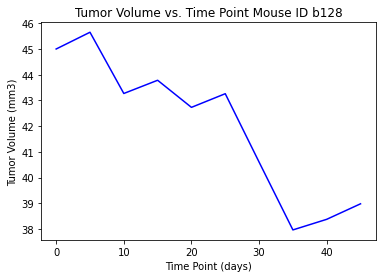

In [52]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#locate the mouse by regimen, created new df
regimen_capomulin_df = new_mouse_study_df.loc[new_mouse_study_df["Drug Regimen"] == "Capomulin", :]
mouse = regimen_capomulin_df.loc[capomulin_df['Mouse ID']== 'b128']

#create x and y axis 
tumorvol = mouse["Tumor Volume (mm3)"]
timepoint = mouse["Timepoint"]
line_plot = plt.plot(timepoint, tumorvol, color='blue')

#Labels for Graph
plt.title("Tumor Volume vs. Time Point Mouse ID b128")
plt.xlabel("Time Point (days)")
plt.ylabel("Tumor Volume (mm3)")

In [43]:
new_mouse_study_df.loc[new_mouse_study_df["Drug Regimen"] == "Capomulin", :]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


Text(0.5, 0, 'Weight (g)')

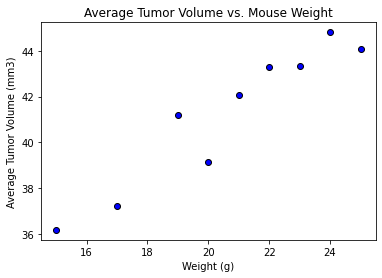

In [68]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#Groupby weight and get the average tumor volume 
groupby_weight_g = regimen_capomulin_df.groupby(['Weight (g)'])
avg_tumorvol = groupby_weight_g["Tumor Volume (mm3)"].mean()


avgerage= pd.DataFrame(avg_tumorvol)['Tumor Volume (mm3)']
weight = avg.index
plt.scatter(weight, avg_tumorvol, marker="o", facecolors="blue", edgecolors="black")

#Creating the titles
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
